In [797]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, os
from scipy.interpolate import CubicSpline


In [2]:
def single(arr):
    #kwargs.setdefault("dtype", np.float32)
    return np.single(arr)

## Problem 1

Differentiate cos(x) and exp(x) at 0.1, 10 using single precision forward, central, and extrapolated difference algorithms

### 1a) Implement the functions for the derivatives

In [219]:
def forward(func, x, h):
    #print(h)
    x, h = single(x), single(h)
    derivative = np.single((func(x + h) - func(x))) / np.single(h)
    return derivative

def central(func, x, h):
    x, h = single(x), single(h)
    derivative = (func(x + single(h/2)) - func(x - single(h/2))) / single(h)
    return derivative

def extrapolated(func, x, h):
    x, h = single(x), single(h)
    derivative = ((np.single(8)*func(x + h) - np.single(8)*func(x-h) + 
                   func(x - np.single(2)*h) - func(x + np.single(2)*h)) / (np.single(12)*h))
    return derivative

### 1b) Calcualte derivatives and make the error plots

##### Calculate derivatives for all cosine cases

In [220]:
func = np.cos
exact_cos01 = np.single(-np.sin(0.1))
exact_cos10 = np.single(-np.sin(10.0))
hs = []

# storing errors for different methods
errors_forward_cos01 = []
errors_forward_cos10 = []
errors_central_cos01 = []
errors_central_cos10 = []
errors_extrap_cos01 = []
errors_extrap_cos10 = []


for i in np.logspace(-9,1.0, num=1000, dtype = np.float32):
#for i in np.arange(1e-6, 1e1, step=0.01, dtype = np.float32):
    hs.append(i)
    
    relative_error_forward_cos01 = np.abs((forward(func, 0.1, i) -  exact_cos01)/exact_cos01)
    relative_error_forward_cos10 = np.abs((forward(func, 10.0, i) -  exact_cos10)/exact_cos10)
    errors_forward_cos01.append(relative_error_forward_cos01)
    errors_forward_cos10.append(relative_error_forward_cos10)
    
    relative_error_central_cos01 = np.abs((central(func, 0.1, i) -  exact_cos01)/exact_cos01)
    relative_error_central_cos10 = np.abs((central(func, 10.0, i) -  exact_cos10)/exact_cos10)
    errors_central_cos01.append(relative_error_central_cos01)
    errors_central_cos10.append(relative_error_central_cos10)
    
    relative_error_extrap_cos01 = np.abs((extrapolated(func, 0.1, i) -  exact_cos01)/exact_cos01)
    relative_error_extrap_cos10 = np.abs((extrapolated(func, 10.0, i) -  exact_cos10)/exact_cos10)
    errors_extrap_cos01.append(relative_error_extrap_cos01)
    errors_extrap_cos10.append(relative_error_extrap_cos10)
    

    

##### Calculate derivatives for all exp cases

In [250]:
func = np.exp
exact_exp01 = np.single(np.exp(0.1))
exact_exp10 = np.single(np.exp(10.0))
hs = []

# storing errors for different methods
errors_forward_exp01 = []
errors_forward_exp10 = []
errors_central_exp01 = []
errors_central_exp10 = []
errors_extrap_exp01 = []
errors_extrap_exp10 = []


for i in np.logspace(-9,1.0, num=1000, dtype = np.float32):
#for i in np.arange(1e-6, 1e1, step=0.01, dtype = np.float32):
    hs.append(i)
    
    relative_error_forward_exp01 = np.abs((forward(func, 0.1, i) -  exact_exp01)/exact_exp01)
    relative_error_forward_exp10 = np.abs((forward(func, 10.0, i) -  exact_exp10)/exact_exp10)
    errors_forward_exp01.append(relative_error_forward_exp01)
    errors_forward_exp10.append(relative_error_forward_exp10)
    
    relative_error_central_exp01 = np.abs((central(func, 0.1, i) -  exact_exp01)/exact_exp01)
    relative_error_central_exp10 = np.abs((central(func, 10.0, i) -  exact_exp10)/exact_exp10)
    errors_central_exp01.append(relative_error_central_exp01)
    errors_central_exp10.append(relative_error_central_exp10)
    
    relative_error_extrap_exp01 = np.abs((extrapolated(func, 0.1, i) -  exact_exp01)/exact_exp01)
    relative_error_extrap_exp10 = np.abs((extrapolated(func, 10.0, i) -  exact_exp10)/exact_exp10)
    errors_extrap_exp01.append(relative_error_extrap_exp01)
    errors_extrap_exp10.append(relative_error_extrap_exp10)
    

    

##### Plotting for errors in np.cos

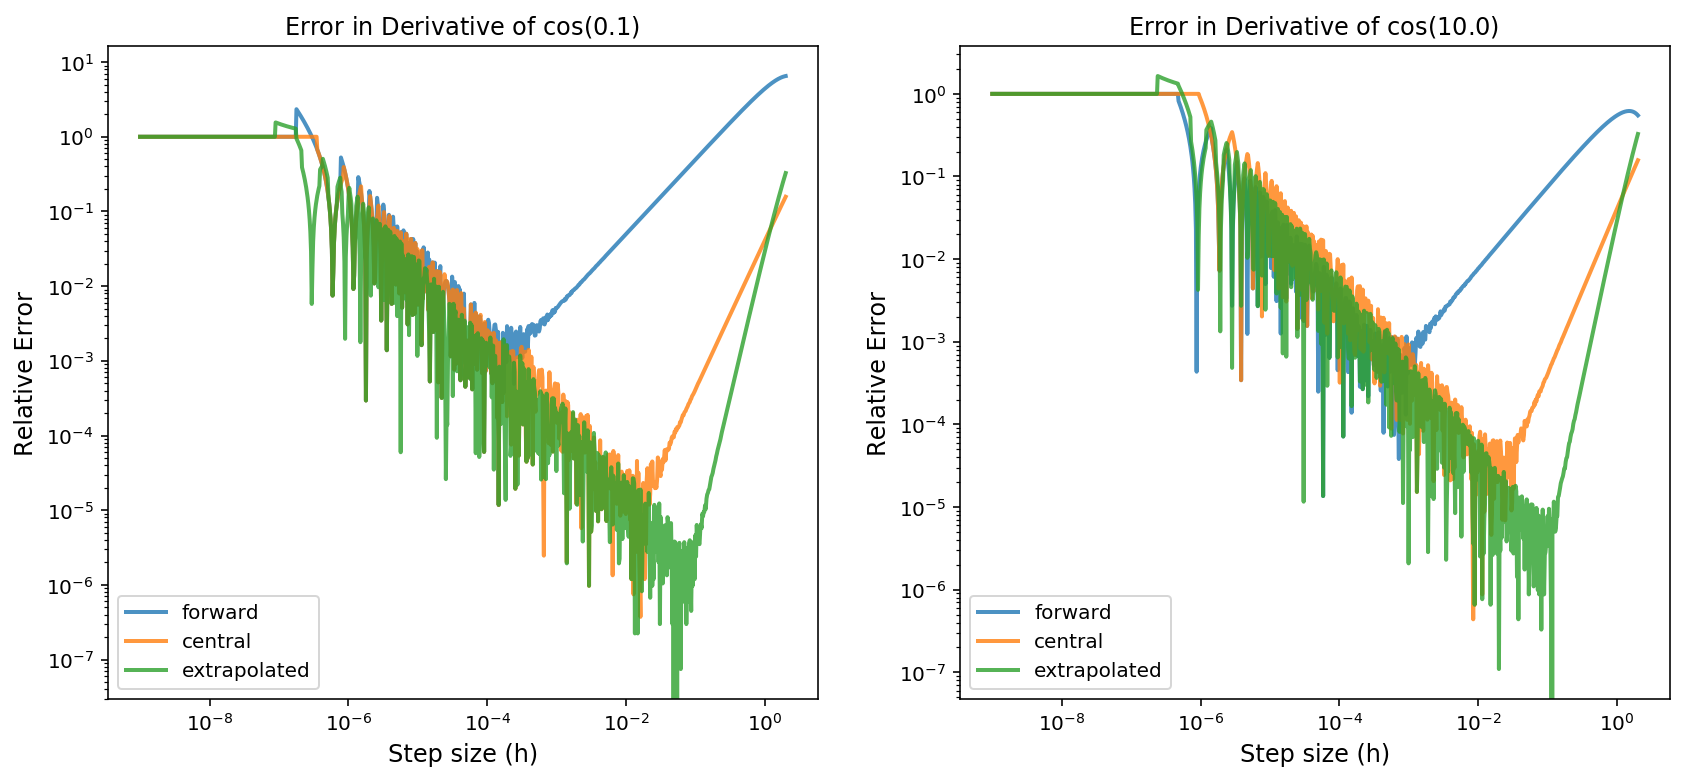

In [780]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(14,6))
ax1.plot(hs[:930], errors_forward_cos01[:930], alpha = 0.8, label = 'forward', linewidth = 2)
ax1.plot(hs[:930], errors_central_cos01[:930], alpha = 0.8, label = 'central', linewidth = 2)
ax1.plot(hs[:930], errors_extrap_cos01[:930], alpha = 0.8, label = 'extrapolated', linewidth = 2)
ax1.set_xlabel("Step size (h)", fontsize = 12)
ax1.set_ylabel("Relative Error", fontsize = 12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='best')
ax1.set_title(r"Error in Derivative of $\cos{(0.1)}$ ")

ax2.plot(hs[:930], errors_forward_cos10[:930], alpha = 0.8, label = 'forward', linewidth = 2)
ax2.plot(hs[:930], errors_central_cos10[:930], alpha = 0.8, label = 'central', linewidth = 2)
ax2.plot(hs[:930], errors_extrap_cos10[:930], alpha = 0.8, label = 'extrapolated', linewidth = 2)
ax2.set_xlabel("Step size (h)", fontsize = 12)
ax2.set_ylabel("Relative Error", fontsize = 12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='best')
ax2.set_title(r"Error in Derivative of $\cos{(10.0)}$ ")
plt.savefig("HW1/DifferentiationError_cos_thicklines.pdf")
plt.show()




##### Plotting for errors in np.exp

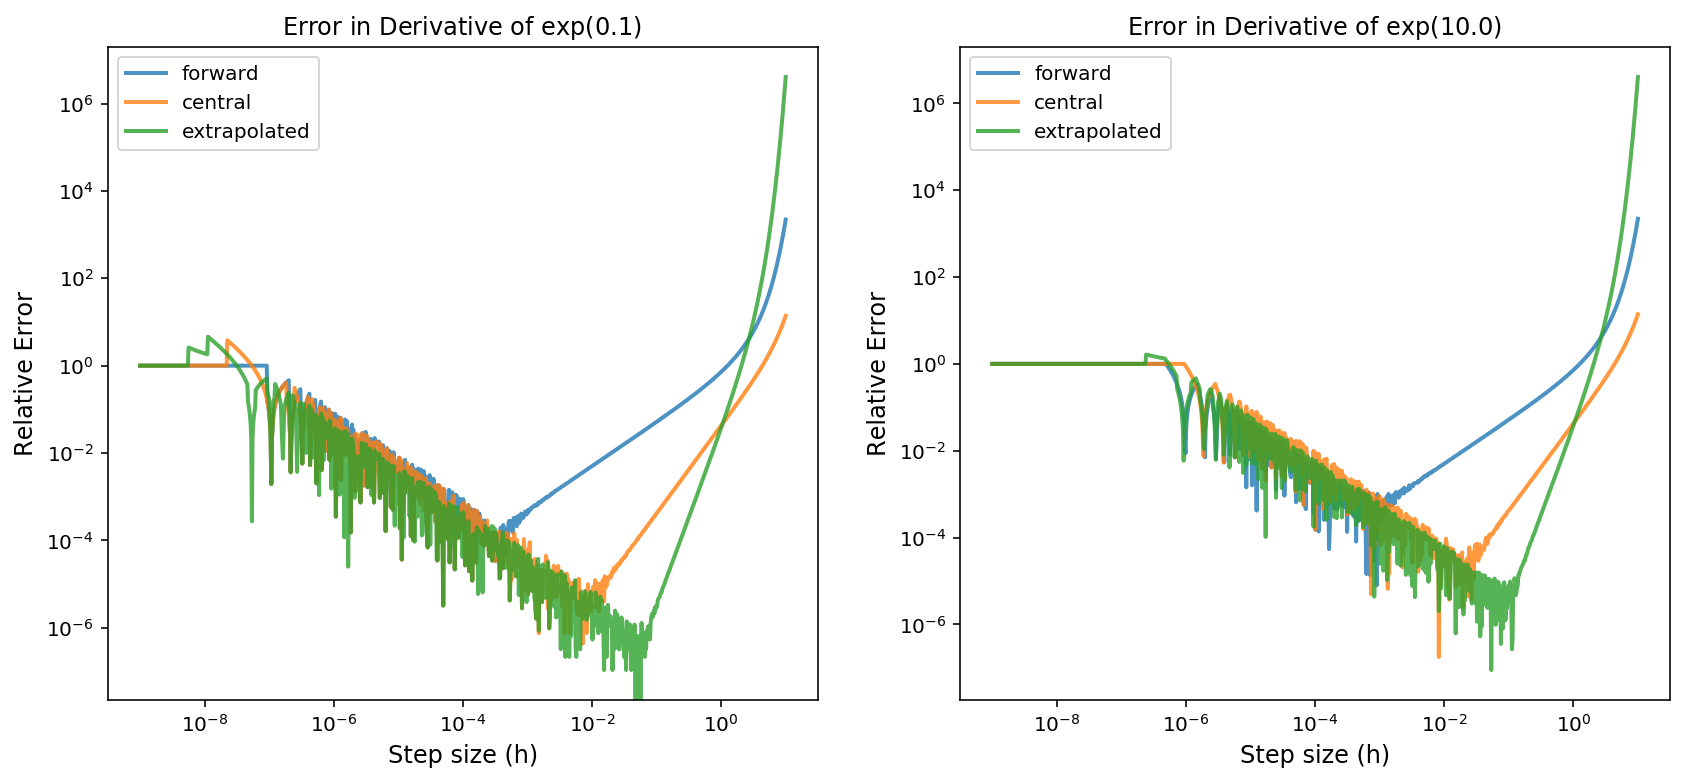

In [776]:

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(14,6))
ax1.plot(hs, errors_forward_exp01, alpha = 0.8, label = 'forward', linewidth = 2)
ax1.plot(hs, errors_central_exp01, alpha = 0.8, label = 'central', linewidth = 2)
ax1.plot(hs, errors_extrap_exp01, alpha = 0.8, label = 'extrapolated', linewidth = 2)
ax1.set_xlabel("Step size (h)", fontsize = 12)
ax1.set_ylabel("Relative Error", fontsize = 12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='best')
ax1.set_title(r"Error in Derivative of $\exp{(0.1)}$ ")

ax2.plot(hs, errors_forward_exp10, alpha = 0.8, label = 'forward', linewidth = 2)
ax2.plot(hs, errors_central_exp10, alpha = 0.8, label = 'central', linewidth = 2)
ax2.plot(hs, errors_extrap_exp10, alpha = 0.8, label = 'extrapolated', linewidth = 2)
ax2.set_xlabel("Step size (h)", fontsize = 12)
ax2.set_ylabel("Relative Error", fontsize = 12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='best')
ax2.set_title(r"Error in Derivative of $\exp{(10.0)}$ ")
#ax2.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.grid(True,which="both",ls="-")
plt.savefig("HW1/DifferentiationError_exp_thicklines.pdf")
plt.show()
#plt.xlim(1e-6, 1)
#plt.ylim(1e-6, 1e1)

## Problem 2

Consider the integral $$ I = \int_{0}^1 e^{-t} dt $$



### 2a) Implement midpoint, trapezoidal, and Simpson's integration

In [500]:
def midpoint(func, a, b, N):
    integral = np.single(0)
    a = np.single(a)
    b = np.single(b)
    N = np.single(N)
    two = np.single(2)
    one = np.single(1)
    x_int = np.single(((two * N + one) * a - b) / (two * N))
    inc = np.single((b - a) / N)
    for k in np.arange(one, N + one):
        x = np.single(x_int) + (k * inc)
        integral += func(x)
    return integral * inc

def trapezoid(func, a, b, N):
    a = np.single(a)
    b = np.single(b)
    N = np.single(N)
    h = np.single((b - a) / (N) ) ## width of each bin
    integral = np.single(0.5)*(func(a) + func(b))
    for i in np.arange(1,N):
        i = np.single(i)
        add = np.single(func(a + i*h))
        integral += add
    return h*integral


def simpsons(func, a, b, N):
    a = np.single(a)
    b = np.single(b)
    N = np.single(N)
    h = np.single((b - a) / (N) )
    integral = func(a) + func(b)
    for i in np.arange(1, N, 2):
        add = np.single(func(a + i*h))
        integral += np.single(4) * add
    for i in np.arange(2, N-1, 2):
        #print(i)
        add = np.single(func(a + i*h))
        integral += np.single(2) * add
    
    return np.single(1/3)*h*integral


def minus_exp(x):
    return np.single(np.exp(-x))

In [781]:
## TEST 

print("exact:",  np.exp(0) - np.exp(-1))
simpsons(minus_exp, 0, 1, 20000)

exact: 0.6321205588285577


0.6321209

#### Calculate relative error integrating $e^{-t}$ from 0 to 1

In [505]:
func = minus_exp
exact_int_exp = np.exp(0) - np.exp(-1)
Ns = []

# storing errors for different methods
errors_midpoint_exp = []
errors_trapezoid_exp = []
errors_simpsons_exp = []




for i in np.geomspace(1, 10000000, num=30, dtype = np.float32):
    Ns.append(i)
    
    relative_error_midpoint_exp= np.abs((midpoint(func, 0,1, i) -  exact_int_exp)/exact_int_exp)
    errors_midpoint_exp.append(relative_error_midpoint_exp)
    
    relative_error_trapezoid_exp = np.abs((trapezoid(func, 0, 1, i) -  exact_int_exp)/exact_int_exp)
    errors_trapezoid_exp.append(relative_error_trapezoid_exp)
    
    relative_error_simpsons_exp = np.abs((simpsons(func, 0, 1, i) -  exact_int_exp)/exact_int_exp)
    errors_simpsons_exp.append(relative_error_simpsons_exp)
    

    

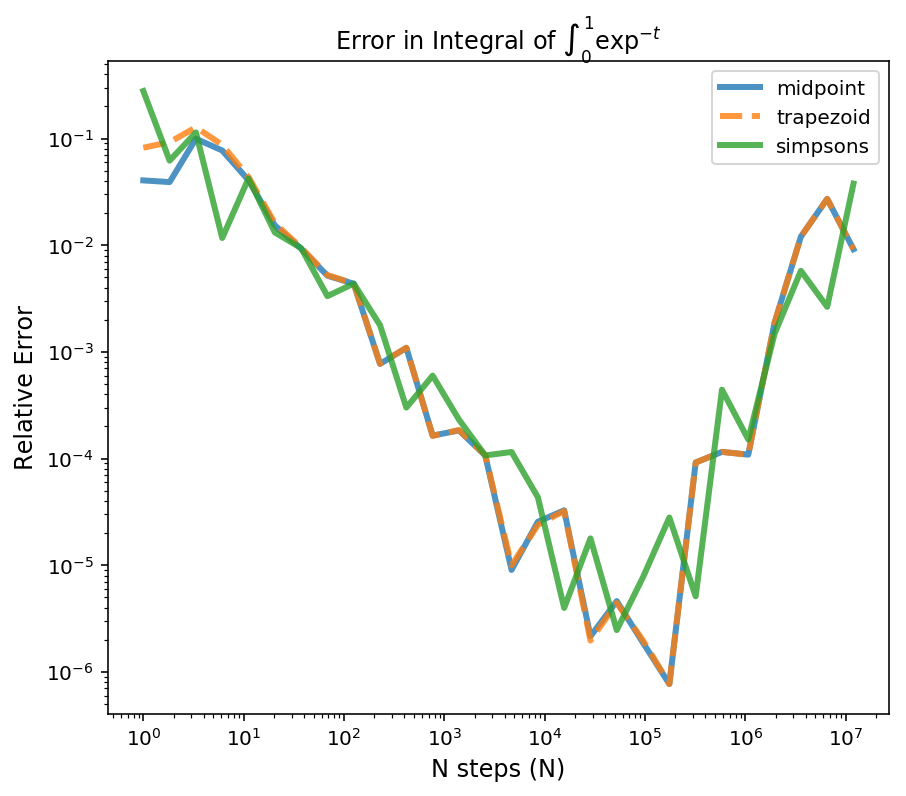

In [767]:
fig, ax1 = plt.subplots(1,1, figsize=(7,6))
ax1.plot(Ns[:28], errors_midpoint_exp[:28], alpha = 0.8, label = 'midpoint', linestyle = '-', linewidth = 3)
ax1.plot(Ns[:28], errors_trapezoid_exp[:28], alpha = 0.8, label = 'trapezoid', linestyle = '--', linewidth = 3)
ax1.plot(Ns[:28], errors_simpsons_exp[:28], alpha = 0.8, label = 'simpsons', linewidth = 3)
ax1.set_xlabel("N steps (N)", fontsize = 12)
ax1.set_ylabel("Relative Error", fontsize = 12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='best')
ax1.set_title(r"Error in Integral of $\int_0^1 \exp^{-t}$ ")
plt.savefig("HW1/IntegrationError_exp.pdf")

## Problem 3

Calculating the correlation function $\xi(r)$ from the wavenumber and power spectrum.

##### Verify that the spline works

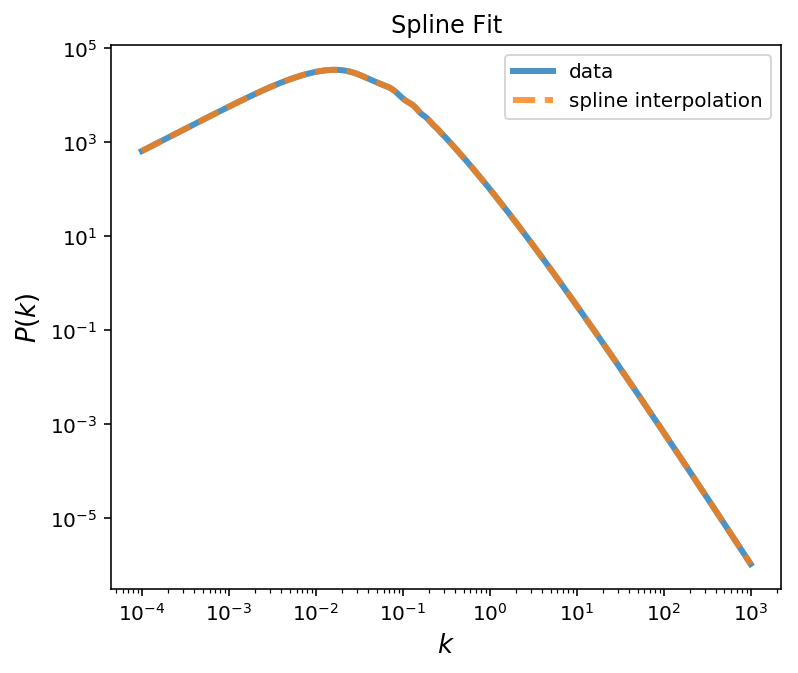

In [808]:
data = np.loadtxt("HW1/lcdm_z0.matter_pk")
k = data[:,0]
pk = data[:,1]
fig = plt.figure(figsize=(6,5))
plt.loglog(k,pk, linewidth = 3, label = 'data', alpha = 0.8)
integrand = spline_pk(k, pk)
plt.loglog(k, integrand(k), alpha = 0.8, linestyle='--', linewidth = 3, label='spline interpolation')
plt.legend(loc='best')
plt.xlabel(r"$k$", fontsize = 13)
plt.ylabel(r"$P(k)$", fontsize = 13)
plt.title("Spline Fit")
plt.savefig("HW1/splineAccuracy.pdf")
plt.show()

#### Write code for integrating the integrand $k^2 P(k) \frac{\sin(kr)}{kr}$ for different r

In [ ]:
#def integrand_spline(ks, pk, r):
#    xs = ks
#    ys = (ks**2)*pk*np.sin(k*r)/(k*r)
#    cs = CubicSpline(xs,ys)
#    return cs

def spline_pk(ks, pk):
    xs = ks
    ys = pk
    cs = CubicSpline(xs,ys)
    return cs

def density_trapezoid_double(func, a, b, N):

    h = (b - a) / (N)  ## width of each bin
    integral = 0.5*(func(a, r, spline) + func(b, r, spline))
    for i in np.arange(1,N):
        add = func(a + i*h, r, spline)
        integral += add
    return h*integral

def density_simpsons(func, a, b, N):

    h = (b - a) / (N) 
    integral = func(a) + func(b)
    for i in np.arange(1, N, 2):
        add = func(a + i*h)
        integral += 4. * add
    for i in np.arange(2, N-1, 2):
        #print(i)
        add = func(a + i*h)
        integral += 2 * add
    
    return (1/3)*h*integral

# def integrand_func(k, r, spline):
    
#     func = (1/2*np.pi**2)*(k**2) * (spline(k)) * np.sin(k*r) / (k*r)
#     return func

def make_integrand(spline, r):
    def integrand_func(k):
        function = ((k**2) * (spline(k)) * np.sin(k*r)) / (k*r)
        return function
    return integrand_func

def integrate_spline(integrand, r, N=10):
    return density_simpsons(integrand, a=1e-4, b=1e3, N=N)
    

density_flucs = []
rs = []
spline = spline_pk(k, pk)

for i in np.linspace(30, 120, 200):
    rs.append(i)
    print(i)
    integrand = make_integrand(spline, i)
    density_fluc_i = (1/(2*np.pi**2))*integrate_spline(integrand, r=i, N = 100000)
    density_flucs.append(density_fluc_i)



#### Make a plot of the enhanced correlation function $r^2\xi(r)$ as a function of $r$.

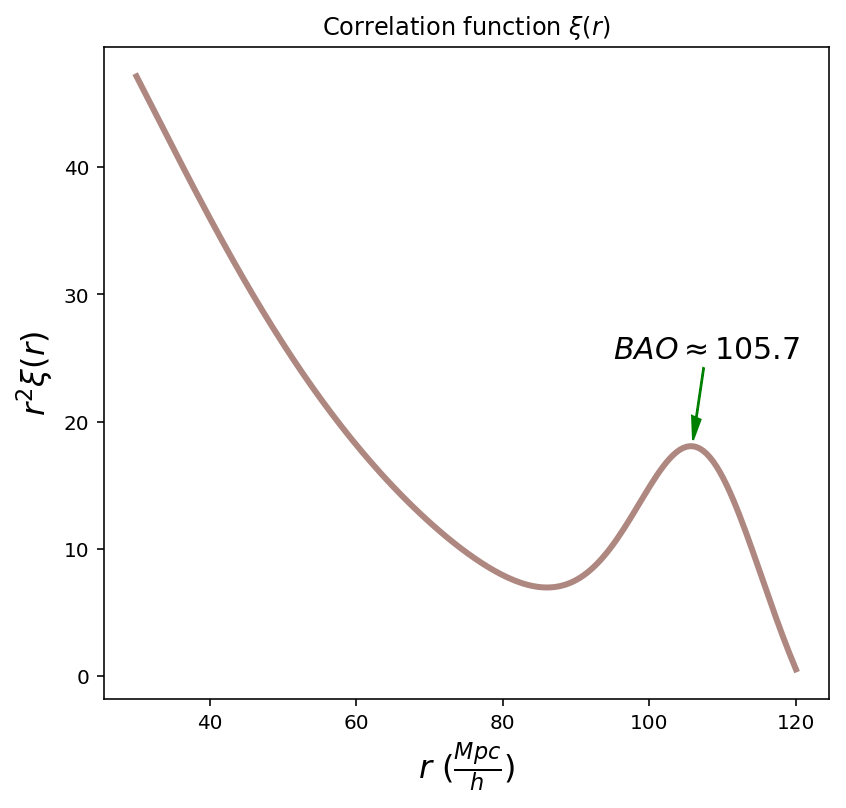

In [809]:
enhanced_flucs = [rs[i]**2*density_flucs[i] for i in range(len(rs))] 
fig = plt.figure(figsize=(6.5,6))
plt.plot(rs, enhanced_flucs, linewidth=3, alpha = 0.7, color='tab:brown')
plt.xlabel(r"$r$ ($\frac{Mpc}{h}$)", fontsize = 16)
plt.ylabel(r"$r^2 \xi(r)$", fontsize = 16)
plt.title(r"Correlation function $\xi(r)$")
plt.text(95, 25, r"$BAO \approx 105.7$", fontsize = 15)
plt.arrow(107.4, 24.2, -1., -3.9, shape='full', width = 0.1, head_width = 1.2, color = 'green')
plt.savefig("HW1/correlationBAO.pdf")
plt.show()